Throughout this Notebook CIFAR10 Dataset is used. You can find the dataset in the following link as well.

[CIFAR10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

# Part 3

Modify the code in Part 2 to carry out stochastic gradient descent with a batch size of 500. 

(a) Report training and testing loss and accuracies.

(b) Compare results with item 2 (justify).

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
#print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

#One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
def find_accuracy(pred,labels):
    pred_class = np.argmax(pred, axis=1)
    ground_truth = np.argmax(labels, axis=1)
    accurate_pred = [pred_class == ground_truth]
    return 100*np.sum(accurate_pred)/len(ground_truth)

In [4]:
def batching(lst , m):
  batched = []
  for i in range(round(len(lst)/m)):
    batched.append(lst[i*m:(i+1)*m])
  return batched;
  

In [5]:
epochs = 300
batch_size = 500
val_batch_size = Nte
iterations = round(Ntr/batch_size)
lr = 1.4e-2
lr_decay=0.999
reg = 0.001
loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

In [6]:
#Weight Initialising
std=1e-5
w1 = std*np.random.randn(Din, 200)
b1 = np.zeros(200)

w2 = std*np.random.randn(200, 10)
b2 = np.zeros(10)

print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)


In [ ]:
for t in range(1,epochs+1):
  indices = np.arange(Ntr)
  rng.shuffle(indices)
  batches = batching(indices, batch_size)

  loss_h = []
  train_acc_h = []
  

  for batch_indices in batches:
    x = x_train[batch_indices]
    y = y_train[batch_indices]

    h = 1./(1.+np.exp(-(x.dot(w1)+b1)))
    y_pred = h.dot(w2)+b2

    loss = 1./(batch_size*2)*np.square(y_pred-y).sum() + reg/(batch_size*2)*(np.sum(w1*w1)+np.sum(w2*w2))
    loss_h.append(loss)

    train_acc = find_accuracy(y_pred, y)
    train_acc_h.append(train_acc)

    dy = 1.0/batch_size*(y_pred-y)

    dw2 = h.T.dot(dy) + 1./batch_size*reg*w2
    w2 -= lr*dw2

    db2 = dy.sum(axis = 0)
    b2 -= lr*db2

    dh = dy.dot(w2.T)

    dw1 = x.T.dot(dh*h*(1-h)) + 1./batch_size*reg*w1
    w1 -= lr*dw1

    db1 = (dh*h*(1-h)).sum(axis =0)
    b1 -= lr*db1

  h_val = 1./(1.+np.exp(-(x_test.dot(w1)+b1)))
  y_pred_val = h_val.dot(w2)+b2
  
  val_loss = 1./(val_batch_size*2)*np.square(y_pred_val-y_test).sum()
  val_loss_history.append(val_loss)

  val_acc = find_accuracy(y_pred_val, y_test)
  val_acc_history.append(val_acc)

  avg_loss = sum(loss_h)/len(loss_h)
  loss_history.append(avg_loss)

  avg_acc = sum(train_acc_h)/len(train_acc_h)
  train_acc_history.append(avg_acc)

  lr *= lr_decay
  if t%5==0 or t == epochs:
    print('Epoch %d/%d: Training Loss: %f, Val Loss:%f,  Training Accuracy: %f, Validation Accuracy: %f'%(t, epochs,avg_loss,val_loss, avg_acc, val_acc))




Epoch 5/300: Training Loss: 0.374442, Val Loss:0.377590,  Training Accuracy: 44.610000, Validation Accuracy: 43.530000
Epoch 10/300: Training Loss: 0.355993, Val Loss:0.372079,  Training Accuracy: 49.280000, Validation Accuracy: 44.640000
Epoch 15/300: Training Loss: 0.342206, Val Loss:0.371156,  Training Accuracy: 53.214000, Validation Accuracy: 45.270000
Epoch 20/300: Training Loss: 0.331660, Val Loss:0.370501,  Training Accuracy: 56.054000, Validation Accuracy: 46.350000
Epoch 25/300: Training Loss: 0.322502, Val Loss:0.373424,  Training Accuracy: 59.070000, Validation Accuracy: 45.600000
Epoch 30/300: Training Loss: 0.314074, Val Loss:0.376494,  Training Accuracy: 61.312000, Validation Accuracy: 45.270000
Epoch 35/300: Training Loss: 0.306173, Val Loss:0.378858,  Training Accuracy: 63.582000, Validation Accuracy: 45.340000
Epoch 40/300: Training Loss: 0.300156, Val Loss:0.381964,  Training Accuracy: 65.494000, Validation Accuracy: 44.790000
Epoch 45/300: Training Loss: 0.293126, Va

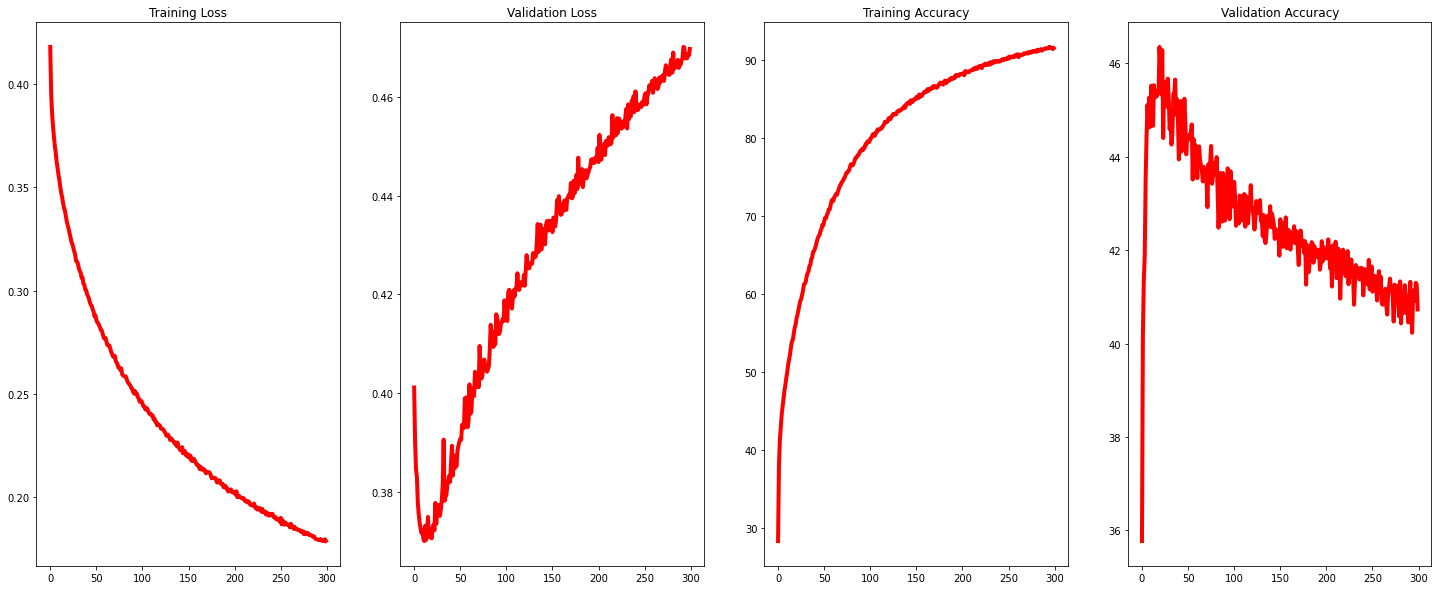

In [10]:
fig, axes  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(25,10))
items = {"Training Loss":loss_history, "Validation Loss":val_loss_history, "Training Accuracy":train_acc_history, "Validation Accuracy": val_acc_history}
i = 1
for key in items.keys():
    plt.subplot(1,4,i);plt.plot(items[key], color ='r', linewidth=4)
    plt.title(key)
    i+=1

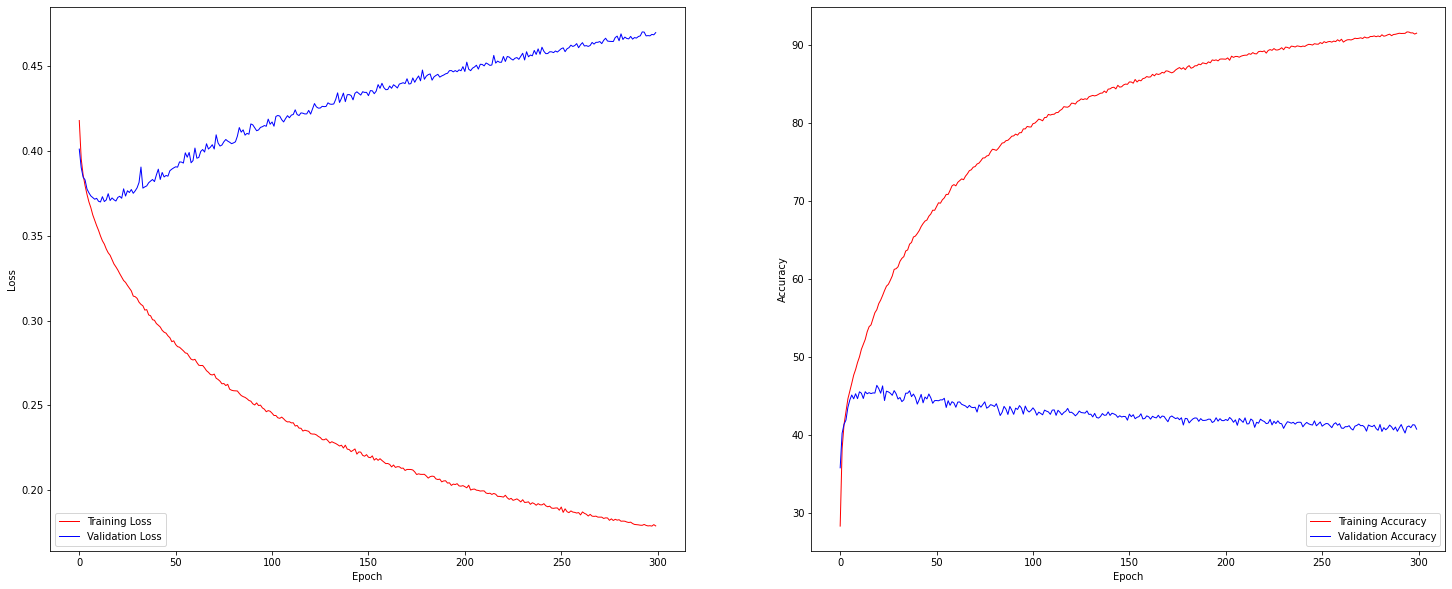

In [17]:
fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(25,10))
items = {"Training Loss":loss_history, "Validation Loss":val_loss_history, "Training Accuracy":train_acc_history, "Validation Accuracy": val_acc_history}

plt.subplot(1,2,1);
plt.plot(items['Training Loss'], color ='r', linewidth=1, label ='Training Loss');
plt.plot(items['Validation Loss'], color ='b', linewidth=1, label = 'Validation Loss');
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.legend(loc='lower left');

plt.subplot(1,2,2);
plt.plot(items['Training Accuracy'], color ='r', linewidth=1, label ='Training Accuracy');
plt.plot(items['Validation Accuracy'], color ='b', linewidth=1, label = 'Validation Accuracy');
plt.xlabel('Epoch');
plt.ylabel('Accuracy');
plt.legend(loc='lower right');
plt.show()